<a href="https://colab.research.google.com/github/forgivefarouk/LQBJfjga77pJJr2M/blob/main/Happy_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Happy Customers
This program takes in a csv file of survey data from a client and uses it to train a machine learning model to predict customer happiness. The CSV file contains 7 features. The Y value will be a binary happiness value while the other features are integers from 1-5. These attributes are as follows:

X1 - The order was delivered on time

X2 - The contents of the order was as expected

X3 - Ordered everything they wanted to

X4 - Paid a good price for the order

X5 - I am satisfied with my courier

X6 - The app made ordering easy

Further analysis will be done to learn which attributes most significantly affect customer happiness

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/ACME-HappinessSurvey2020.csv')

In [39]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [41]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


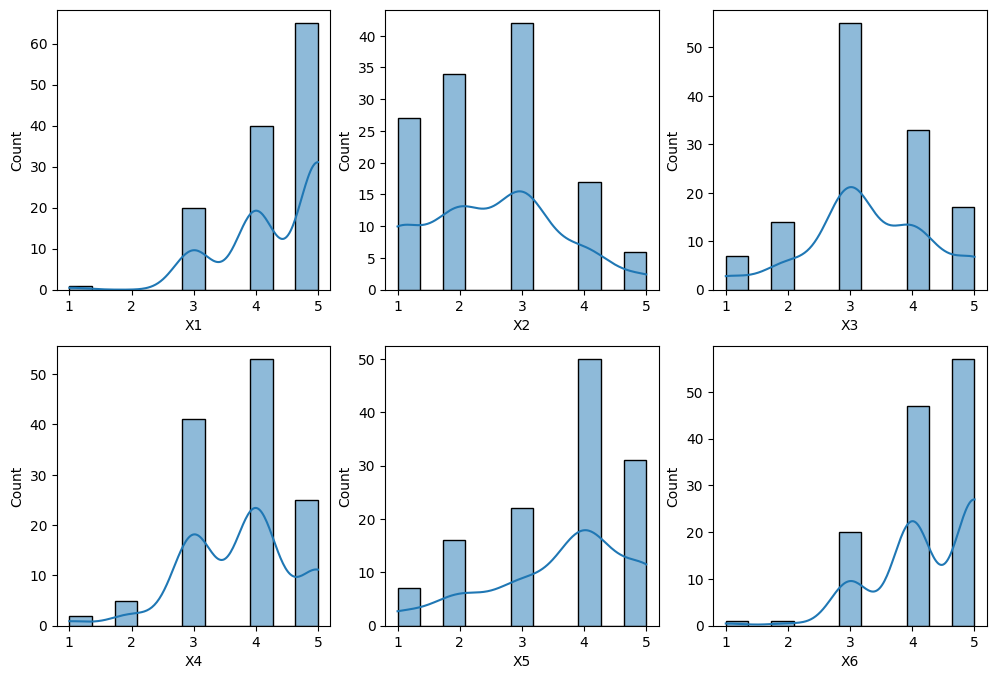

In [42]:
fig ,ax = plt.subplots(2,3,figsize=(12,8))
cols = df.columns
index=1
for i in range(2):
  for j in range(3):
    sns.histplot(data=df, x=cols[index], kde=True, ax=ax[i, j])
    index +=1


In [43]:
from sklearn.preprocessing import StandardScaler

X=df.drop(columns='Y')
y=df['Y']


##BaseLine Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score,precision_score,recall_score,confusion_matrix,classification_report,make_scorer

X_train , X_valid , y_train ,y_valid = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

X_train.shape , y_train.shape ,X_valid.shape

((100, 6), (100,), (26, 6))

In [45]:
models= {'Logis':LogisticRegression(),'KNN':KNeighborsClassifier(),'Dtree':DecisionTreeClassifier(),'RandomFroest':RandomForestClassifier(),'SVC':SVC()}
acc={}

In [46]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for name,model in models.items():
  scores = cross_val_score(model, X_train, y_train, cv=kfold)
  acc[name]=np.mean(scores)

In [47]:
acc

{'Logis': 0.6096256684491979,
 'KNN': 0.5894236482471776,
 'Dtree': 0.5490196078431372,
 'RandomFroest': 0.5793226381461675,
 'SVC': 0.5995246583481878}


##Tunning Parameter for SVC

In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
f1_scorer = make_scorer(f1_score)
param_grid = {
    'kernel': ['linear', 'poly','rbf'],
    'C': [0.01,0.1,4,20,50,100],
    'degree' : [1, 2, 3,4], # Only applicable for kernel = poly
    'gamma' : ['scale', 'auto']
}


grid_search = RandomizedSearchCV(SVC(), param_grid, cv=kfold,scoring=f1_scorer)
grid_search.fit(X_train, y_train)
best_params_svc = grid_search.best_params_
best_model_svc = grid_search.best_estimator_
results = grid_search.cv_results_

# Print all combinations of hyperparameters and their scores
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"Mean Score: {mean_score:.4f}, Hyperparameters: {params}")


Mean Score: 0.7089, Hyperparameters: {'kernel': 'poly', 'gamma': 'auto', 'degree': 3, 'C': 50}
Mean Score: 0.6680, Hyperparameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 50}
Mean Score: 0.6859, Hyperparameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 20}
Mean Score: 0.7376, Hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 100}
Mean Score: 0.7529, Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 4}
Mean Score: 0.6932, Hyperparameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'C': 20}
Mean Score: 0.7338, Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'C': 0.01}
Mean Score: 0.7246, Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 1, 'C': 20}
Mean Score: 0.6047, Hyperparameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'C': 0.1}
Mean Score: 0.7529, Hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'C': 4}


In [49]:
best_params_svc

{'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 4}

In [50]:
f1_score(y_train , best_model_svc.predict(X_train))

0.6991869918699186

In [51]:
f1_score(y_valid , best_model_svc.predict(X_valid))

0.5185185185185185

In [52]:
model =SVC(kernel='poly', gamma='scale', degree=2 , C=20)
model.fit(X_train,y_train)

SVC(C=20, degree=2, kernel='poly')

f1_score is 0.7500000000000001
precision_score is 0.6923076923076923
recall_score is 0.8181818181818182
confusion_matrix is Axes(0.125,0.11;0.62x0.77)
accuracy is 0.7692307692307693
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.69      0.82      0.75        11

    accuracy                           0.77        26
   macro avg       0.77      0.78      0.77        26
weighted avg       0.78      0.77      0.77        26



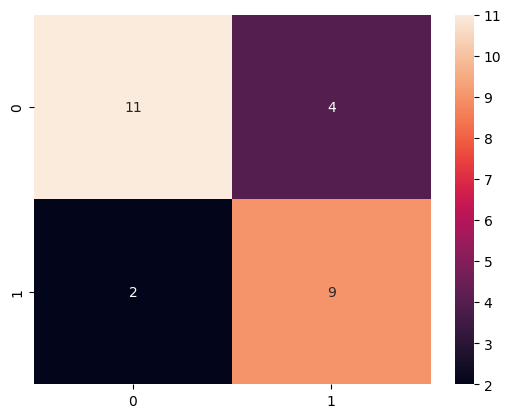

In [53]:
pred =model.predict(X_valid)  # Example metric (you can use other metrics as well)
print(f'f1_score is {f1_score(y_valid,pred)}')
print(f'precision_score is {precision_score(y_valid,pred)}')
print(f'recall_score is {recall_score(y_valid,pred)}')
print(f'confusion_matrix is {sns.heatmap(confusion_matrix(y_valid,pred),annot=True)}')
print(f'accuracy is {accuracy_score(y_valid,pred)}')
print(f'{classification_report(y_valid,pred)}')

##Tunning parameters to RF

In [54]:
rf = RandomForestClassifier()
f1_scorer = make_scorer(f1_score)

param_grid = {
    'n_estimators': [100, 200, 300,400,500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [4,6,10,12],  # Minimum number of samples required at each leaf node

}
grid_search = RandomizedSearchCV(rf, param_grid, cv=5,scoring=f1_scorer)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
best_model_rf = grid_search.best_estimator_


In [55]:
best_params_rf , grid_search.best_score_

({'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 6,
  'max_depth': 30},
 0.7035706322662845)

In [56]:
rf_model = RandomForestClassifier(max_depth=None,min_samples_leaf=8,min_samples_split=2,n_estimators=400)
rf_model.fit(X_train,y_train)
f1_score(y_valid,rf_model.predict(X_valid))

0.6060606060606061

In [57]:
fe_imp = pd.DataFrame(rf_model.feature_importances_.reshape(-1,6),columns=X.columns)

In [58]:
cat =list(fe_imp.columns)
val =list(fe_imp.values[0])

<BarContainer object of 6 artists>

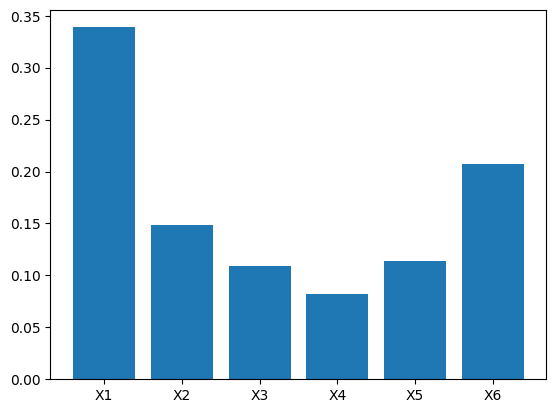

In [59]:
plt.bar(cat,val)

f1_score is 0.5625
precision_score is 0.42857142857142855
recall_score is 0.8181818181818182
confusion_matrix is Axes(0.125,0.11;0.62x0.77)


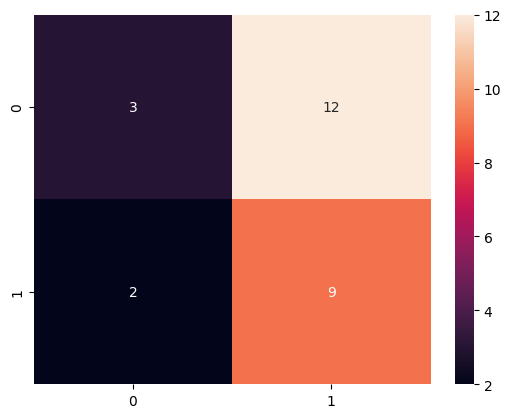

In [60]:
pred =best_model_rf.predict(X_valid)  # Example metric (you can use other metrics as well)
print(f'f1_score is {f1_score(y_valid,pred)}')
print(f'precision_score is {precision_score(y_valid,pred)}')
print(f'recall_score is {recall_score(y_valid,pred)}')
print(f'confusion_matrix is {sns.heatmap(confusion_matrix(y_valid,pred),annot=True)}')


##KNN

In [61]:
knn_classifier = KNeighborsClassifier()  # You can specify the number of neighbors here if needed
f1_scorer = make_scorer(f1_score)

sc =StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_valid = sc.transform(X_valid)

param_grid = {
    'n_neighbors': [3,5,6,10,14,20],  # Example values to try
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1,2],  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,15,20,25,30]

}
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=kfold,scoring=f1_scorer)  # 5-fold cross-validation
grid_search_knn.fit(sc_X_train, y_train)
best_params = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_


In [62]:
best_params ,grid_search.best_score_

({'algorithm': 'auto',
  'leaf_size': 10,
  'n_neighbors': 10,
  'p': 1,
  'weights': 'distance'},
 0.7035706322662845)

In [63]:
knn = KNeighborsClassifier(n_neighbors= 6, p=1, weights='uniform')
knn.fit(sc_X_train,y_train)
f1_score(y_train,knn.predict(sc_X_train))

0.752136752136752

In [64]:
f1_score(y_valid,knn.predict(sc_X_valid))

0.7500000000000001

f1_score is 0.7500000000000001
precision_score is 0.6923076923076923
recall_score is 0.8181818181818182
confusion_matrix is Axes(0.125,0.11;0.62x0.77)


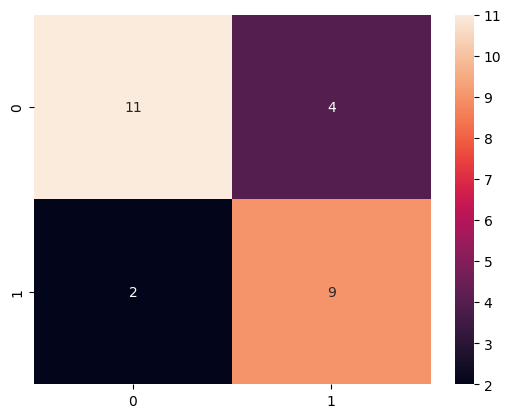

In [65]:
pred =knn.predict(sc_X_valid)  # Example metric (you can use other metrics as well)
print(f'f1_score is {f1_score(y_valid,pred)}')
print(f'precision_score is {precision_score(y_valid,pred)}')
print(f'recall_score is {recall_score(y_valid,pred)}')
print(f'confusion_matrix is {sns.heatmap(confusion_matrix(y_valid,pred),annot=True)}')


##Note
##The best Two Models is SVC and KNN with accuracy 75%

##Feature Selection

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [67]:
BestFeatures = SelectKBest(score_func=chi2, k=5)
fit_imp = BestFeatures.fit(X,y)

In [68]:
f_score = pd.concat([pd.DataFrame(fit_imp.feature_names_in_) ,pd.DataFrame(fit_imp.scores_)],axis=1)
f_score.columns = ['Features','Scores']

In [69]:
f_score.sort_values(by='Scores',ascending=False)

,Features,Scores
4,X5,2.273286
0,X1,1.449041
2,X3,0.900104
5,X6,0.541070
3,X4,0.106194
1,X2,0.036161


<BarContainer object of 6 artists>

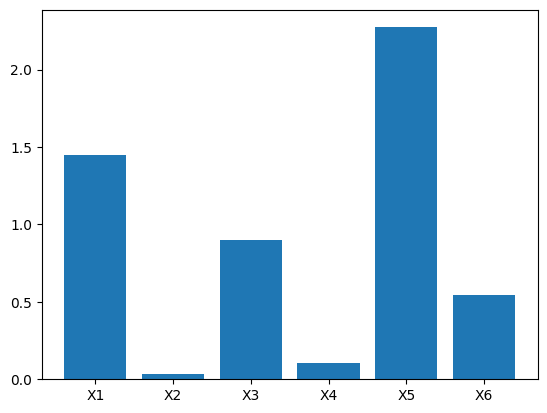

In [70]:
plt.bar(f_score.Features,f_score.Scores)

##Permutation importance

In [71]:
pip install eli5

In [72]:
import eli5
from eli5.sklearn import PermutationImportance

In [73]:
knn = KNeighborsClassifier(n_neighbors= 6, p=1, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [74]:
f_scorer = make_scorer(f1_score)
perm =PermutationImportance(knn,scoring=f_scorer,random_state=42).fit(X_valid,y_valid)

In [75]:
plt.figure(figsize=(12,8))
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())


Weight,Feature
0.2101 ± 0.1058,X1
0.1535 ± 0.0826,X3
0.1093 ± 0.2163,X5
0.0668 ± 0.1390,X2
0.0662 ± 0.1809,X6
-0.0381 ± 0.1111,X4


<Figure size 1200x800 with 0 Axes>

So the best 3 Features is X1 , X3 and X5